In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Loading dataset from github**

In [ ]:
url = 'https://raw.githubusercontent.com/Aqeel-0/test/build/diabetes.csv'
df = pd.read_csv(url)
df.head()
column_names = list(df.columns.values)


In [ ]:
X = df.iloc[:,:-1]
y = df["Outcome"]
dict_bnb = {}
dict_mnb = {}
dict_gnb = {}
dict_dtr = {}
RocAucbnb = {}
RocAucmnb = {}
RocAucgnb = {}
RocAucdtr = {}
y.info(), X.info()

In [ ]:
def plot(y_test, y_pred):
  from sklearn.metrics import confusion_matrix  
  import seaborn as sns

  print("Confusion Matrix : ")
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ['True Pos','False Pos','False Neg','True neg']
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()
  print("**********************************************")


In [ ]:
def reports(y_test, y_pred):
  from sklearn.metrics import classification_report
  plot(y_test, y_pred)
  print("**********************************************")
  print("Classification Evaluation : ")
  print(classification_report(y_test, y_pred, zero_division = 0))

### Classification using BernoulliNB Naive Bayes

In [ ]:
def FBouBernoulli(split, alpha_value = 1.0, binarize_value = 0.0, fit_prior_value = False):
  from sklearn.naive_bayes import BernoulliNB
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  #scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  #scaler.fit_transform(X_train)
  #scaler.transform(X_test)
  classifier = BernoulliNB(alpha = alpha_value, binarize = binarize_value, fit_prior = fit_prior_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("value: alpha: "+str(alpha_value) + " binarize: " + str(binarize_value) + " fit_prior: " +str(fit_prior_value))
  print("**********************************************")
  accuracy = accuracy_score(y_test, y_pred)
  if str(split) in dict_bnb:
    if dict_bnb[str(split)][0] < accuracy:
      dict_bnb[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3' and accuracy > dict_bnb[str(split)][0]:
      RocAucbnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_bnb[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3':
      RocAucbnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  reports(y_test, y_pred)


In [ ]:
## Train-Test split 0.3
FBouBernoulli(0.3)
FBouBernoulli(0.3, 1.0, 1.5)
FBouBernoulli(0.3, 1.0, 1.5, True)

In [ ]:
## Train-Test split 0.4
FBouBernoulli(0.4)

In [ ]:

## Train-Test split 0.5
FBouBernoulli(0.5)
FBouBernoulli(0.5, 1.0, 7.9)
FBouBernoulli(0.5, 1.0, 7.9, True)

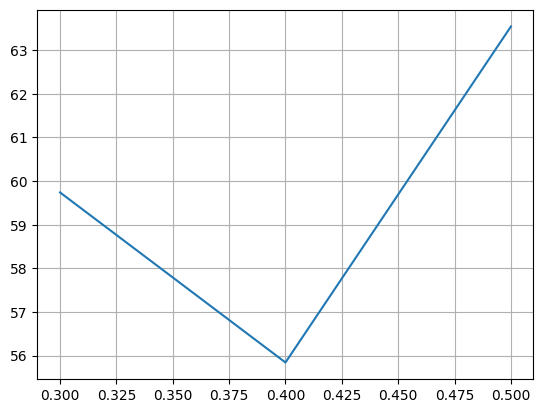

In [87]:
keys = dict_bnb.keys()
y_points = []
for key in keys:
  y_points.append(dict_bnb[key][0]*100)
x_points = [float(key) for key in dict_bnb.keys()]

plt.plot(x_points, y_points)
plt.grid(True)
plt.show()


## Classification using Multinomial Naive Bayes

In [ ]:
def FMultinomial(split, alpha_value = 1.0):
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split)
  classifier = MultinomialNB(alpha = alpha_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("value: alpha: "+str(alpha_value))
  print("**********************************************")
  accuracy = accuracy_score(y_test, y_pred)
  if str(split) in dict_mnb:
    if dict_mnb[str(split)][0] < accuracy:
      dict_mnb[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3' and accuracy > dict_mnb[str(split)][0]:
      RocAucmnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_mnb[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3':
      RocAucmnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  reports(y_test, y_pred)




In [ ]:
## Train-Test split 0.2
FMultinomial(0.2)
FMultinomial(0.2, 1.8)

In [ ]:
## Train-Test split 0.3
FMultinomial(0.3)
FMultinomial(0.3, 2.9)

In [ ]:
## Train-Test split 0.4
FMultinomial(0.4)
FMultinomial(0.4, 1.1)

In [ ]:
## Train-Test split 0.5
FMultinomial(0.5)
FMultinomial(0.5, 4.8)

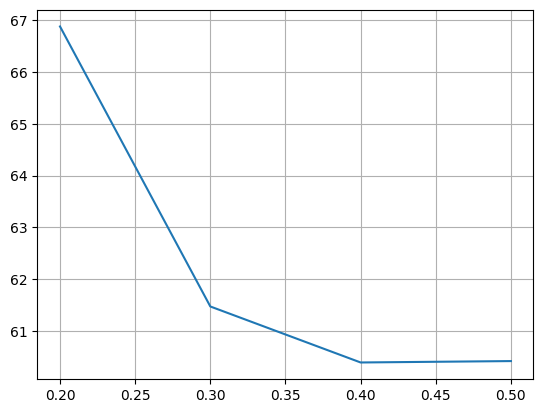

In [86]:
keys = dict_mnb.keys()
y_points = []
for key in keys:
  y_points.append(dict_mnb[key][0]*100)
x_points = [float(key) for key in dict_mnb.keys()]

plt.plot(x_points, y_points)
plt.grid(True)
plt.show()


### **Classification using Guassian Naive Bayes**

In [ ]:
def FGaussian(split):
  from sklearn.naive_bayes import GaussianNB
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)
  classifier = GaussianNB()
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("**********************************************")
  reports(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  if str(split) in dict_gnb:
    if dict_gnb[str(split)][0] < accuracy:
      dict_gnb[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3' and accuracy > dict_gnb[str(split)][0]:
      RocAucgnb['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_gnb[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3':
      RocAucgnb['max'] = {'y_test': y_test, 'y_pred': y_pred}



In [ ]:
## Train-Test split 0.2
FGaussian(0.2)

In [ ]:
## Train-Test split 0.3
FGaussian(0.3)

In [ ]:
## Train-Test split 0.4
FGaussian(0.4)

In [ ]:

## Train-Test split 0.5
FGaussian(0.5)

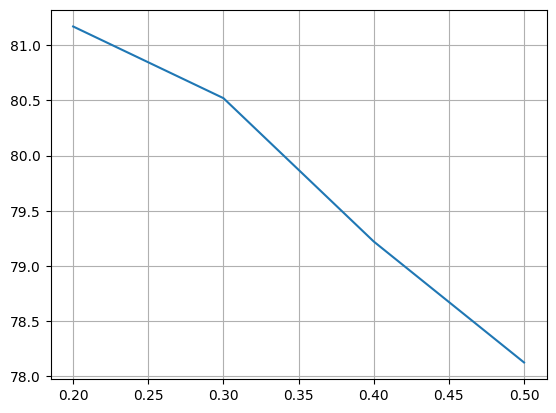

In [85]:
keys = dict_gnb.keys()
y_points = []
for key in keys:
  y_points.append(dict_gnb[key][0]*100)
x_points = [float(key) for key in dict_gnb.keys()]

plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **Classification using Decision Tree**

In [ ]:
def decision_tree(split, criterion_value):
  from sklearn.model_selection import train_test_split
  from sklearn.tree import DecisionTreeClassifier
  from sklearn import tree
  from sklearn.metrics import accuracy_score
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = split, random_state=44)
  scaler.fit_transform(X_train)
  scaler.transform(X_test)

  classifier = DecisionTreeClassifier(criterion = criterion_value)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  print("Train-test split: " + str(split))
  print("Value: Entropy: " + criterion_value)
  print("**********************************************")
  reports(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)

  if str(split) in dict_dtr:
    if dict_dtr[str(split)][0] < accuracy:
      dict_dtr[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3' and accuracy > dict_dtr[str(split)][0]:
      RocAucdtr['max'] = {'y_test': y_test, 'y_pred': y_pred}
  else:
    dict_dtr[str(split)] = [accuracy, y_test, y_pred]
    if str(split) == '0.3':
      RocAucdtr['max'] = {'y_test': y_test, 'y_pred': y_pred}

  reports(y_test, y_pred)      
  fig = plt.figure(figsize=(12,8))
  _ = tree.plot_tree(classifier,
                    feature_names=column_names,
                    class_names=['outcome1', 'outcome2'],
                    filled=True)
  


In [ ]:
decision_tree(0.2, 'entropy')

In [ ]:
decision_tree(0.2, 'gini')

In [ ]:
decision_tree(0.3, 'entropy')

In [ ]:
decision_tree(0.3, 'gini')

In [ ]:
decision_tree(0.4, 'entropy')

In [ ]:
decision_tree(0.4, 'gini')

In [ ]:
decision_tree(0.5, 'entropy')

In [ ]:
decision_tree(0.5, 'gini')

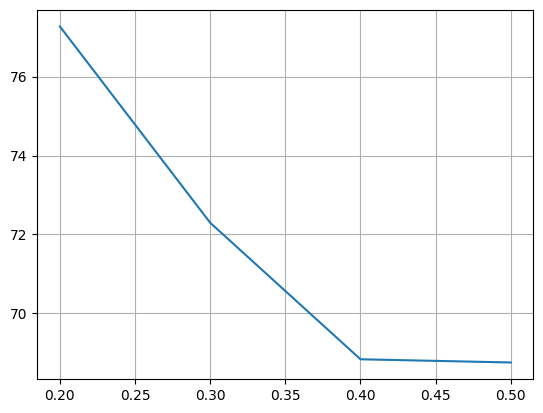

In [84]:
keys = dict_dtr.keys()
y_points = []
for key in keys:
  y_points.append(dict_dtr[key][0]*100)
x_points = [float(key) for key in dict_dtr.keys()]


plt.plot(x_points, y_points)
plt.grid(True)
plt.show()

### **ROC curve and ROC_AUC score for all the classifier having maximum accuracy when train test split 70-30.**

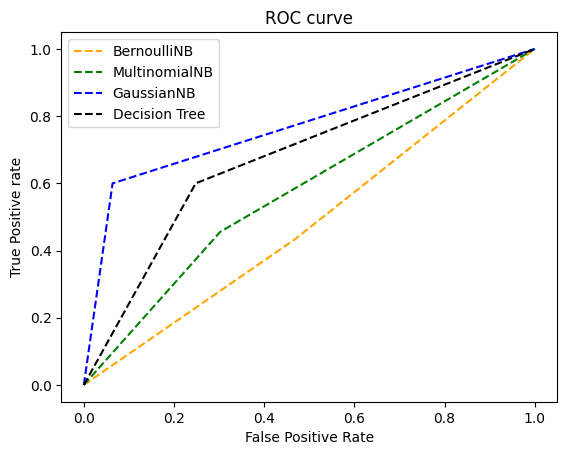

In [79]:
from sklearn import metrics
def auc_roc():
    fpr1, tpr1, _1 = metrics.roc_curve(RocAucbnb['max']['y_test'], RocAucbnb['max']['y_pred'], pos_label=1)
    fpr4, tpr4, _3 = metrics.roc_curve(RocAucmnb['max']['y_test'], RocAucmnb['max']['y_pred'], pos_label=1)
    fpr2, tpr2, _2 = metrics.roc_curve(RocAucgnb['max']['y_test'], RocAucgnb['max']['y_pred'], pos_label=1)
    fpr3, tpr3, _3 = metrics.roc_curve(RocAucdtr['max']['y_test'], RocAucdtr['max']['y_pred'], pos_label=1)
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='BernoulliNB')
    plt.plot(fpr4, tpr4, linestyle='--',color='green', label='MultinomialNB')
    plt.plot(fpr2, tpr2, linestyle='--', color='blue', label= 'GaussianNB')
    plt.plot(fpr3, tpr3, linestyle='--', color='black', label= 'Decision Tree')
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show()
auc_roc()

**Best result for BernoulliNB Naive Bayes**

Confusion Matrix : 


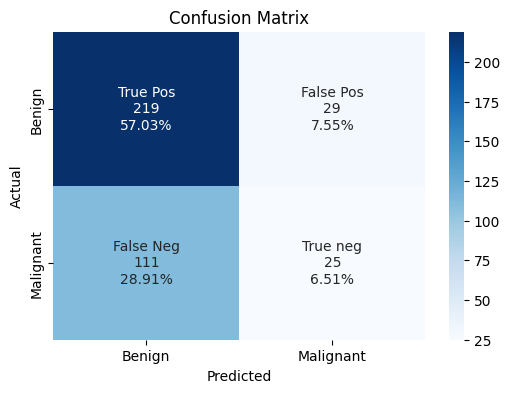

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.66      0.88      0.76       248
           1       0.46      0.18      0.26       136

    accuracy                           0.64       384
   macro avg       0.56      0.53      0.51       384
weighted avg       0.59      0.64      0.58       384



In [80]:
# print( dict_dtr)
maxi=0
y_test = []
y_pred = []
for key in dict_bnb:
  if maxi < 100*dict_bnb[key][0]:
    maxi = 100*dict_bnb[key][0]
    y_test = dict_bnb[key][1]
    y_pred = dict_bnb[key][2]
reports(y_test, y_pred)


**Best result for Multinomial Naive Bayes**

Confusion Matrix : 


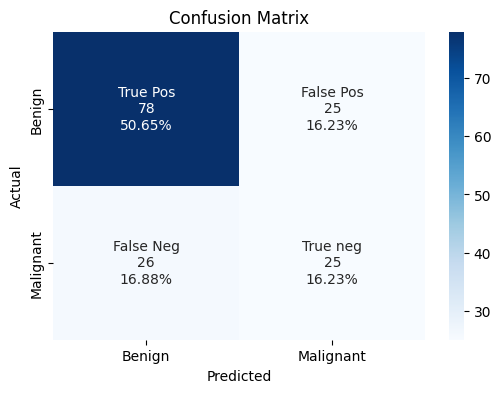

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       103
           1       0.50      0.49      0.50        51

    accuracy                           0.67       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.67      0.67      0.67       154



In [81]:
# print( dict_dtr)
maxi=0
y_test = []
y_pred = []
for key in dict_mnb:
  if maxi < 100*dict_mnb[key][0]:
    maxi = 100*dict_mnb[key][0]
    y_test = dict_mnb[key][1]
    y_pred = dict_mnb[key][2]
reports(y_test, y_pred)


**Best result for Gaussian Naive Bayes**

Confusion Matrix : 


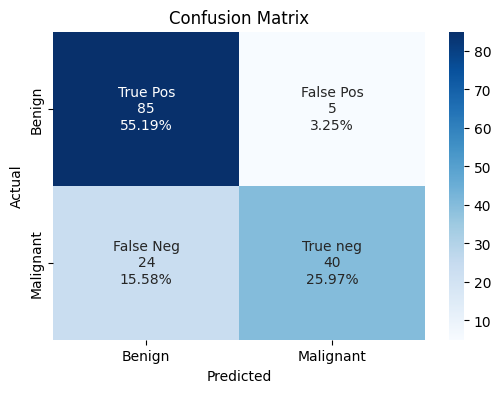

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        90
           1       0.89      0.62      0.73        64

    accuracy                           0.81       154
   macro avg       0.83      0.78      0.79       154
weighted avg       0.83      0.81      0.80       154



In [82]:
# print( dict_dtr)
maxi=0
y_test = []
y_pred = []
for key in dict_gnb:
  if maxi < 100*dict_gnb[key][0]:
    maxi = 100*dict_gnb[key][0]
    y_test = dict_gnb[key][1]
    y_pred = dict_gnb[key][2]
reports(y_test, y_pred)


**Best result for Decision Tree Classifier**

Confusion Matrix : 


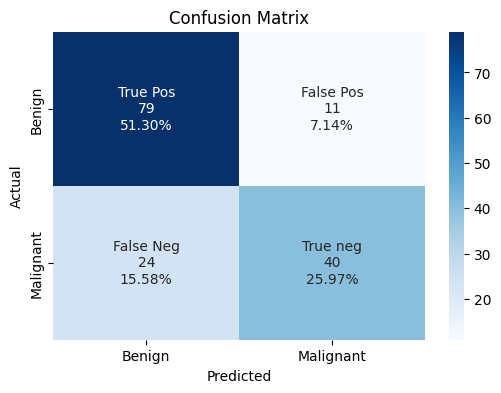

**********************************************
**********************************************
Classification Evaluation : 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        90
           1       0.78      0.62      0.70        64

    accuracy                           0.77       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.77      0.77      0.77       154



In [83]:
# print( dict_dtr)
maxi=0
y_test = []
y_pred = []
for key in dict_dtr:
  if maxi < 100*dict_dtr[key][0]:
    maxi = 100*dict_dtr[key][0]
    y_test = dict_dtr[key][1]
    y_pred = dict_dtr[key][2]
reports(y_test, y_pred)
